<a href="https://colab.research.google.com/github/AugustoBonifacio001/AugustoBonifacio001/blob/testes_e_exercicios/exercicio_cosamp.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np

In [ ]:
# definindo a matriz de medições Phi (5 linhas, 10 colunas)
Phi = np.random.rand(5,10)
# vetor esparso u (tamanho 10)

u =  np.array([0,0,0,1,0,0,0,0,0,2])

# inicialização do cosamp

a = np.zeros(Phi.shape[1])
v =u
iter =0
halt = False

while not halt:
  iter += 1
  print(f"Iteração {iter}")
  print("a:", a)
  print("v:", v)

  if iter ==3:
    halt = True

print("Resultado final:")
print("a:", a)
print("v:", v)

Iteração 1
a: [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
v: [0 0 0 1 0 0 0 0 0 2]
Iteração 2
a: [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
v: [0 0 0 1 0 0 0 0 0 2]
Iteração 3
a: [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
v: [0 0 0 1 0 0 0 0 0 2]
Resultado final:
a: [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
v: [0 0 0 1 0 0 0 0 0 2]


In [ ]:
# definindo a matriz de medições Phi( 8 linhas e 15 colunas)
Phi_exercicio = np.random.rand(8 , 15)

#vetor esparso u

u_exercicio = np.array([0,0,0,0,0,1,0,0,0,0,0,2,0,0,0])

# inicialização do CoSaMP

a_exercicio = np.zeros(Phi_exercicio.shape[1])
v_exercicio = u
iter_exercicio = 0
halt_exercicio = False

# implementando o loop principal do CoSaMP

while not halt_exercicio:
  iter_exercicio +=1
  print(f"Iteração {iter_exercicio}")
  print("a_exercicio:", a_exercicio)
  print("v_exercicio", v_exercicio)


if iter_exercicio == 4:
  halt_exercicio = True

print("Resultado final:")
print("a_exercicio:", a_exercicio)
print("v_exercicio:", v_exercicio)

A saída de streaming foi truncada nas últimas 5000 linhas.
a_exercicio: [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
v_exercicio [0 0 0 1 0 0 0 0 0 2]
Iteração 23465
a_exercicio: [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
v_exercicio [0 0 0 1 0 0 0 0 0 2]
Iteração 23466
a_exercicio: [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
v_exercicio [0 0 0 1 0 0 0 0 0 2]
Iteração 23467
a_exercicio: [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
v_exercicio [0 0 0 1 0 0 0 0 0 2]
Iteração 23468
a_exercicio: [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
v_exercicio [0 0 0 1 0 0 0 0 0 2]
Iteração 23469
a_exercicio: [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
v_exercicio [0 0 0 1 0 0 0 0 0 2]
Iteração 23470
a_exercicio: [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
v_exercicio [0 0 0 1 0 0 0 0 0 2]
Iteração 23471
a_exercicio: [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
v_exercicio [0 0 0 1 0 0 0 0 0 2]
Iteração 23472
a_exercicio: [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
v_exercic

KeyboardInterrupt: 

In [ ]:
n = 7 #número de dias para treinar
s = 2 #atividades significativas que queremos rastrear
tolerancia =0.05
max_iterações =10

#quantidade em horas de exercícios
quantidade_diaria_exercicio = np.array([0.5,0,1,0,2,0,1.5])

#simulando medições aleatórias reduzidas

amostras_aleatorias = np.round((n-1)*np.random.rand(s)).astype(int)
medicoes = quantidade_diaria_exercicio[amostras_aleatorias]

# Criando uma matriz de observações (modelo simplificado)

Phi = np.eye(n)

#inicializando o vetor esparso a

a = np.zeros(n)

# vetor de resíduos (inicializando com as medições)

v = medicoes

# inicializando a iteração

iteracao = 0
parar = False

# CoSaMP para reconstruir o vetor esparso

while not parar:
  iteracao +=1
  print(f"Iteração:",{iteracao})
  print("Atividades rastreadas:", a)
  print("Medições simuladas:", v)

  # calculando as projeções
  projecoes = np.abs(np.dot(np.transpose(Phi), v))

  #selecionando os índices significativos com base nas projeções

  indices_significativos = [i for (i, val) in enumerate(projecoes) if val > np.sort(projecoes)[::-1][2 * s] and val > 1e-10]

  conjunto_indices = np.union1d(indices_significativos, a.nonzero()[0])

  pesos = np.dot(np.linalg.pinv(Phi[:, conjunto_indices]), medicoes)

  indices_preenchidos = (np.abs(pesos) > np.sort(np.abs(pesos))[::-1][s]) & (np.abs(pesos) > 1e-10)
  conjunto_indices = conjunto_indices[indices_preenchidos]

 # Atualizando o vetor esparso
  a[conjunto_indices] = pesos[indices_preenchidos]

    # Atualizando os resíduos
  v = medicoes - np.dot(Phi[:, conjunto_indices], pesos[indices_preenchidos])

    # Condição de parada
  parar = np.linalg.norm(v) / np.linalg.norm(medicoes) < tolerancia or iteracao > max_iteracoes

# Resultado final
print("\nResultado final:")
print("Atividades rastreadas:", a)
print("Medições simuladas:", v)

# Visualizando o resultado
plt.figure(figsize=(8, 4))
plt.bar(range(n), quantidade_diaria_exercicio, color='blue', alpha=0.6, label='Real')
plt.bar(amostras_aleatorias, medicoes, color='red', label='Medições')
plt.bar(range(n), a * 2, color='green', alpha=0.4, label='Reconstruído')
plt.xlabel('Dias da Semana')
plt.ylabel('Quantidade de Exercício (horas)')
plt.title('Reconstrução da Quantidade de Exercício Diário')
plt.legend()
plt.show()











Iteração: {1}
Atividades rastreadas: [0. 0. 0. 0. 0. 0. 0.]
Medições simuladas: [0. 1.]


ValueError: shapes (7,7) and (2,) not aligned: 7 (dim 1) != 2 (dim 0)

In [ ]:
def cosamp(Phi , u, s, tol = 1e-10, max_iter=10):
  max_iter -= 1
  num_precision = 1e-12
  a = np.zeros(Phi.shape[1])
  v = u
  iter = 0
  halt = False
  while not halt:
    iter += 1
    y = np.abs(np.dot(np.transpose(Phi), v))
    Omega = [i for (i , val) in enumerate(y) if val>np.sort(y)[::-1][2*s]]
    T = np.union1d(Omega , a.nonzero()[0])
    b = np.sort(np.linalg.pinv(Phi[:,T],u))
    igood = (np.abs(b) > np.sort(np.abs(b[::-1][s]) & (np.abs > num_precision)))
    T = T[igood]
    a[T] = b[igood]
    v = u - np.dot(Phi[:,T])
    halt = np.linalg.norm(v)/np.linalg.norm(u) < tol or iter > max_iter






In [ ]:
lista_magica = [10, 20, 30, 40]
for (indice, valor) in enumerate(lista_magica):
  print(f"Na posição {indice}, há um valor mágico :{valor}")

Na posição 0, há um valor mágico :10
Na posição 1, há um valor mágico :20
Na posição 2, há um valor mágico :30
Na posição 3, há um valor mágico :40


In [ ]:
Phi = np.array([[1,2,3],[4,5,6],[7,8,9]])
v = np.array([2,0,1])
print(Phi)

for (indice, coluna) in enumerate(np.transpose(Phi)):
  print(f"Na posição {indice}, há uma coluna mágica: {coluna}")



projecao_magica = np.dot(np.transpose(Phi), v)
print(projecao_magica)
y = np.abs(projecao_magica)


[[-1 -2 -3]
 [ 4  5  6]
 [ 7  8  9]]
Na posição 0, há uma coluna mágica: [-1  4  7]
Na posição 1, há uma coluna mágica: [-2  5  8]
Na posição 2, há uma coluna mágica: [-3  6  9]
[5 4 3]


In [ ]:
y = np.array([10, 5, 8, 15, 3, 12])
s = 2

for (indice, valor) in enumerate(y):
  print(f"Na posição {indice}, há um valor: {valor}")

s_valores_ordenados = np.sort(y)[::-1]
print(s_valores_ordenados)

Omega = [i for (i, val) in enumerate(y) if val> s_valores_ordenados[2*s]]
print("O conjunto mágico Omega é:", Omega)


Na posição 0, há um valor: 10
Na posição 1, há um valor: 5
Na posição 2, há um valor: 8
Na posição 3, há um valor: 15
Na posição 4, há um valor: 3
Na posição 5, há um valor: 12
[15 12 10  8  5  3]
O conjunto mágico Omega é: [0, 2, 3, 5]


In [ ]:
s = 2
y = np.array([10, 5, 8, 15, 3, 12])

s_valores_ordenados = np.sort(y)[::-1]
print(s_valores_ordenados)
indice_limite = 2*s
limite = s_valores_ordenados[indice_limite]
print("O limite calculado é:", limite)




[15 12 10  8  5  3]
O limite calculado é: 5


In [ ]:
feitiços = ["Levitação", "Invisibilidade", "Bola de Fogo", "Transformação", "Curar Ferimentos"]
for (indice, feitico) in enumerate(feitiços):
  print(f"No índice {indice}, há um feitiço mágico chamado: {feitico}")

poderes_magicos = [50 ,30, 70, 60, 40]

feitiços_poderosos = [feitico for (indice, feitico) in enumerate(feitiços) if poderes_magicos[indice] > 40]
print("Feitiços Poderosos:", feitiços_poderosos)



No índice 0, há um feitiço mágico chamado: Levitação
No índice 1, há um feitiço mágico chamado: Invisibilidade
No índice 2, há um feitiço mágico chamado: Bola de Fogo
No índice 3, há um feitiço mágico chamado: Transformação
No índice 4, há um feitiço mágico chamado: Curar Ferimentos
Feitiços Poderosos: ['Levitação', 'Bola de Fogo', 'Transformação']


In [ ]:
import numpy as np
import matplotlib.pyplot as plt

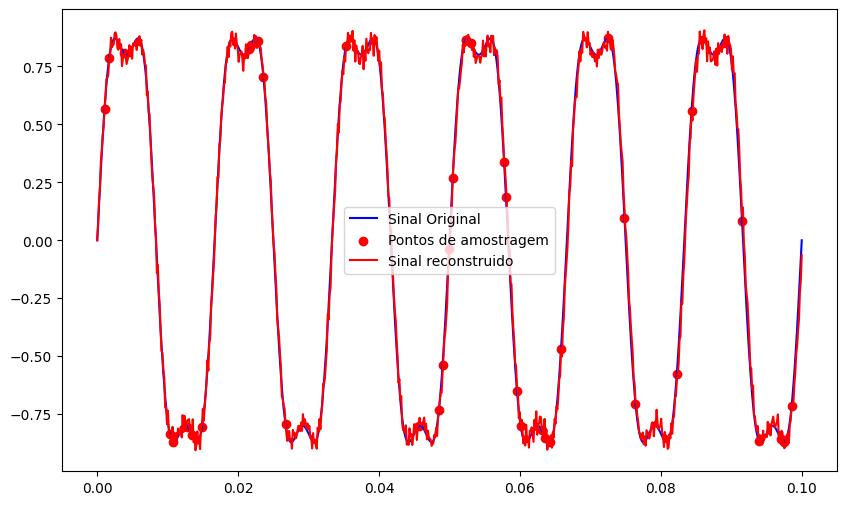

In [ ]:
def cosamp(Phi, u, s, tolerancia=1e-10, max_iteracoes=10):
    max_iteracoes -= 1
    precisao_numerica = 1e-12
    coeficientes_sinal = np.zeros(Phi.shape[1])
    residuo = u
    iteracao = 0
    parar_iteracao = False

    while not parar_iteracao:
        iteracao += 1
        projecoes = np.abs(np.dot(np.transpose(Phi), residuo))
        indices_significativos = [i for(i, valor) in enumerate(projecoes) if valor > np.sort(projecoes)[::-1][2*s]]
        conjunto_indices = np.union1d(indices_significativos, coeficientes_sinal.nonzero()[0])
        pesos = np.dot(np.linalg.pinv(Phi[:, conjunto_indices]),u)
        coeficientes_bons = np.logical_and(np.abs(pesos) > np.sort(np.abs(pesos))[::-1][s], np.abs(pesos) > precisao_numerica)
        conjunto_indices = conjunto_indices[coeficientes_bons]
        coeficientes_sinal[conjunto_indices] = pesos[coeficientes_bons]
        residuo = u - np.dot(Phi[:, conjunto_indices], pesos[coeficientes_bons])
        parar_iteracao = np.linalg.norm(residuo)/np.linalg.norm(u) < tolerancia or iteracao > max_iteracoes

    return coeficientes_sinal

n = 6*128
t = np.linspace(0.0, 0.1, num=n)
x = np.sin(60*2*np.pi*t) + 0.2*np.sin(180*2*np.pi*t)

p = 40
amostras_aleatorias = np.round((n-1)*np.random.rand(p)).astype(int)
y = x[amostras_aleatorias]

Phi = np.fft.fft(np.eye(n,n))
CPhi = np.imag(Phi[amostras_aleatorias, :])

s_reconstruido = cosamp(CPhi, y, 10)
x_rec_cosamp = np.imag(np.fft.fft(s_reconstruido))

plt.figure(figsize=(10,6))
plt.plot(t, x, 'b', label='Sinal Original')
plt.scatter(t[amostras_aleatorias], x[amostras_aleatorias], color='red', label= 'Pontos de amostragem')
plt.plot(t, x_rec_cosamp, 'r', label='Sinal reconstruido')
plt.legend()
plt.show()


In [20]:
import scipy.linalg
import scipy.signal
from sklearn.linear_model import OrthogonalMatchingPursuit

In [21]:
def omp(Phi, u, s):
  omp_model = OrthogonalMatchingPursuit(n_nonzero_coefs=s)
  omp_model.fit(Phi, u)
  return omp_model.coef_

def calculate_mse(original, reconstructed):
  return np.mean((original - reconstructed)**2)


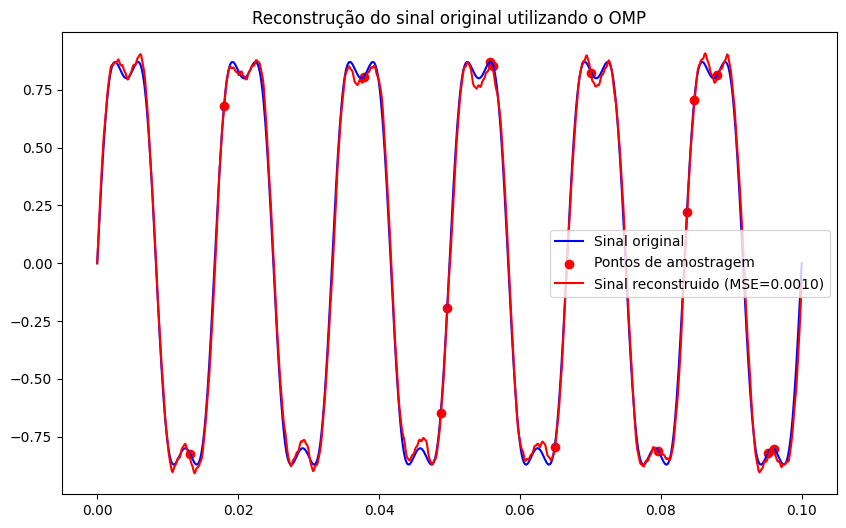

In [40]:
n = 6*128
t = np.linspace(0.0, 0.1, num=n)
x= np.sin(60*2*np.pi*t) + 0.2*np.sin(180*2*np.pi*t)

p = 15
amostras_aleatorias = np.round((n-1)*np.random.rand(p)).astype(int)
y = x[amostras_aleatorias]

Phi = np.fft.fft(np.eye(n,n))
CPhi = np.imag(Phi[amostras_aleatorias, :])

s_reconstruido = omp(CPhi, y, 10)

x_rec = np.imag(np.fft.fft(s_reconstruido))

mse_omp = calculate_mse(x, x_rec)

plt.figure(figsize=(10, 6))
plt.plot(t, x, 'b', label = 'Sinal original')
plt.scatter(t[amostras_aleatorias], x[amostras_aleatorias], color= 'red', label = 'Pontos de amostragem')
plt.plot(t, x_rec, 'r', label =f'Sinal reconstruido (MSE={mse_omp:.4f})')
plt.title("Reconstrução do sinal original utilizando o OMP")
plt.legend()
plt.show()